# Calculus
First, as in every new kernel, you should start with setting up the environment, as explained in the first part.

In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)

## Functions

> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.1
> #### Define function as a symbol, as a variable and as a python function. What are the differences in using these differnt types of functions?

In [2]:
# as a symbol, three ways
x, y, z = symbols ('x, y, z')
f = symbols('f', cls=Function)
g = symbols('g', cls=Function)(x)
h = symbols('h', cls=Function)(x,y,z)

In [3]:
f(x)
g
h

In [4]:
del f, g, h

In [5]:
# when assigning function to g, it is trated as an equation. g is still only a symbol representing that function
# function g is not callable!!!
g = symbols('g', cls=Function)(x)
eq1 = Eq(g,x**2+1)
eq1
g

In [6]:
# to change value of x one can use subs()
eq1.subs(x,2*y+3)
eq1.subs(x,2)

In [7]:
# as a variable, it can be called later on
h = x**2+1
h
h.subs(x,2*y+3)
h.subs(x,2)

In [8]:
# as a python function
def f(x):
    return x**2+1

f(x)
f(2*y+3)
f(2)

## Series calculation
> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.2
> #### Calculate sums of series below:
>   $$ \sum\limits_{i=1}^\infty \frac {1} {n(n+1)} $$
>   $$ \sum\limits_{i=1}^\infty log( \frac {n}{n+1})  $$

In [9]:
n, m, x = symbols('n, m, x')

summation(1/(n*(n+1)),(n,1,oo))
summation(log(n/n+1),(n,1,oo))

## Limits
> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.3
> #### Calculate limits using _limit()_ function.

_source:_ https://obliczone.pl/zadania/funkcje/granice-funkcji

In [10]:
limit(sin(x)+1/x**2, x, 0)
limit(sin(x)/x, x, 0)
limit(sin(x)/sqrt(x), x, 0, dir='+') # right hand limit

## Derivatives
> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.3
> #### Calculate derivative of expression: $ x^y + 2xyz - xy^{yz} - y^y + e^{xyz} $ with diferent combinations. Use multiple derivatives. Use _.diff()_, _Derivative()_ and _.doit()_.

In [11]:
x,y,z = symbols("x,y,z")

In [12]:
expr = x**y + 2*x*y*z - x*y**y*z - y**y + exp(x*y*z)
expr

In [13]:
expr.diff(x)
expr.diff(y)
expr.diff(z)

In [14]:
#this gives the same result
expr.diff(x,z)
expr.diff(x).diff(z)

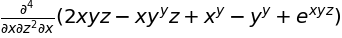

True

In [15]:
#there is another way to calculate derivatives
deriv = Derivative(expr, x,z,z,x)
deriv # only applies derivative without calculation
deriv.doit() #performs the differentiation
deriv.doit() == expr.diff(x,z,z,x)

#### <left><img src='https://image.flaticon.com/icons/svg/179/179386.svg' width="25px"></left> Difference between functions and their integrals - based on different function types from above

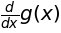

In [16]:
def f(x):
    return x**2+1
g = symbols('g', cls=Function)(x)
h = x**2+1

f(x).diff(x)
g.diff(x)
h.diff(x)

## Integrals
> ### <left><img src='https://image.flaticon.com/icons/svg/717/717954.svg' width="30px"></left> Ex.3
> #### Find integrals of expressions and show difference between _Integral_ and _integrate()_.

$$ \int 2x+10 dx $$

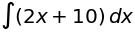

True

In [17]:
expr = 2*x + 10
Integral(expr,x)
Integral(expr,x).doit()
integrate(expr,x)
Integral(expr,x).doit() == integrate(expr,x)

$$ \int e^{2x} dx $$

In [18]:
expr = exp(2*x)
integrate(expr)

$$ \int_{0}^{4} \sqrt{x+y} dx $$

In [19]:
integrate(sqrt(x+y),(x,0,4))

$$ \int_{0}^{5} \int_{0}^{4} \sqrt{x+y} dx dy$$

In [20]:
integrate(integrate(sqrt(x+y),(x,0,4)),(y,0,5))

$$ \int_{0}^{4} x^3 \sqrt{x^2+9} dx $$

In [24]:
expr = x**3*sqrt(x**2+9)
integrate(expr,(x,0,4))

_source:_ https://obliczone.pl/zadania/ca%C5%82ki/ca%C5%82ki-podw%C3%B3jne

$$ \int_{0}^{2} \int_{x}^{x^2} xy^2 dy dx $$

In [25]:
expr = y**2*x
integrate(integrate(expr,(y,x**2,x)),(x,0,2))

$$ \int \int_{2x}^{x^2} 4x + 2 dy dx $$

In [26]:
expr = 4*x+2
integrate(integrate(expr,(y,2*x,x**2)),x)